# COGS 118A - Project Checkpoint

# Names

- Duy Vu
- Lexu (Gavin) Zhao
- Tianyi Bian
- Tunan Li

# Abstract 

Our goal is to design and execute a machine-learning model that estimates room occupancy based on temperature, light, sound, CO2, and digital passive infrared (PIR) data. We will use data provided by UCI, which consists of 10,129 instances and 16 attributes. The data was collected in a 6m - 4.6m room with seven sensor nodes and one edge node in a star configuration. The sensor nodes transmit data every 30 seconds to measure changes in a room over 3 days. Amongst the 7 sensors, 4 of them are able to measure temperature, light, and sound simultaneous, 1 is able to measure CO2 and CO2 change, and 2 is able to measure movement based on PIR.  Hence we have 4*3+2+2=16 variables in our final dataset. To generate an accurate model predicting room occupancy, we will use Random Forest  and using published data as our performance benchmark. Because Random forest consists multiple decision trees and decision trees are insensitive to data normalization, we do not need to further normalize the data. But we might still need to do feature selection if needed. By executing this project, we hope to accurately estimate room occupancy, which can be used to optimize energy consumption and improve building management. We will measure the performance of the two models by comparing the F1-score and the confusion matrix evaluated using 10-fold cross-validation.



# Background

In recent years, there has been a growing interest in developing smart and energy-efficient buildings. One important aspect of building management is the efficient use of resources, including energy consumption. Occupancy-based control is a popular strategy for optimizing energy usage in buildings. By accurately estimating the number of occupants in a room, building managers can adjust heating, cooling, and lighting systems to meet the occupants' needs while minimizing energy waste. The building might also sent out automatic warnings to facilitate security guards when it detects occupents after closing time.
Research on occupancy-based control using machine learning has been active in recent years. Many studies have proposed and evaluated various models and algorithms for predicting occupancy based on sensor data. For instance, the study conducted by Wang et al. (2019) <a name="cite1" href="https://www.sciencedirect.com/science/article/pii/S0926580518302656"><sup>[1]</sup></a> used SVM and Random Forest models to estimate occupancy based on temperature and humidity sensor data. The study carried out a 30-day experiment in a library and utilized data mining techniques to model occupancy patterns. As a result, the heating, ventilation, and air conditioning (HVAC) systems were able to achieve better performance. 

Another research is from Adarsh et al. (2020)<a name="cite2" href="https://web2py.iiit.ac.in/research_centres/publications/view_publication/mastersthesis/872"><sup>[2]</sup></a> that studies the sensor data analytics and data reduction techniques. The research discussed occupancy estimation using ML, analysis of ML algorithms from the perspective of constrained microcontrollers, and ML-based data transmission reduction for occupancy applications. Additionally, occupancy estimation is a key task in building automation, energy efficiency, and security. Previous research has proposed various approaches to estimate occupancy levels, including the use of multivariate sensor nodes and machine learning algorithms (Singh et al., 2018)<a name="cite2" href="https://web.archive.org/web/20200310233053id_/https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2624923/globecomm-2019.pdf?sequence=1"><sup>[3]</sup></a>. In this project, we build upon this previous work by developing a machine learning model to predict room occupancy levels in a specific context.

# Problem Statement

This project aims to develop a machine-learning model that accurately estimates and predicts the number of people in a room using a dataset collected at different times throughout 4 days from various types of sensors, including those that detect temperature, light, sound, CO2, and PIR, respectively. It’s contributional in solving the task of monitoring room occupancy in real-time. To achieve this goal, our machine learning algorithm, based on the methods of logistic regression or decision trees, will be trained and tested using a large dataset of sensor measurements collected from real-world scenarios.

Significance: 

The development of a machine learning project to predict room occupancy could have significant implications for predicting and preventing burglary in private households. By analyzing factors such as temperature, sound, and time, the model could help to identify anomalies in household occupancy patterns and alert homeowners to potential security threats. This could be especially useful for people who travel frequently or have second homes that are left unoccupied for extended periods of time. 

Addditionally, The development of a machine learning model to predict room occupancy has significant implications for future public usage, such as in a public library. With accurate and timely predictions of the number of people in a given space predicted the machine learning model, library staff can optimize their resources, ensuring that there are enough staff members to meet the needs of patrons, and minimizing costs at the same time. The model could also be used to improve the overall user experience under the context of library rooms. By analyzing factors such as temperature and sound, the model can provide insights into the comfort level of library spaces, which can effectively help staff to make adjustments to optimize the user experience. The development of this model could pave the way for future innovations in public area management and resource allocation. As machine learning and other artificial intelligence technologies continue to advance, public places will have more tools at their disposal to improve their operations and services.

Overall, even though our model has a disadvantage due to the limited results it could produce (a room with less than 4 people), the significance of this project lies in its potential to improve the efficiency, effectiveness, and overall user experience of public spaces such as library rooms and the security of the private household.

# Data

Room Occupancy Estimation Data Set: 
- Link: https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation
- Reference: Data collected by Adarsh Pal Singh (IIIT Hyderabad, India), Dr. Sachin Chaudhari (IIIT Hyderabad, India)
- Size of the dataset: 16 variables, 10130 observations
- An observation consists with the specified time during the period of 4 days and the readout values from five different types of non-intrusive sensors that measure temperature (4 sensors), light (4 sensors), sound (4 sensors), CO2 (2 sensors) and digital passive infrared (2 sensors). The ground-truth value of a number of occupancies is also included. The variables listed below are considered to be critical, and they are represented in terms of numerical values with units labeled: temperature in degrees Celsius, light in Lux, sound in Volts (read by ADC devices), and Carbon Dioxide in PPM.
- Since each type of sensor includes multiple devices, we need to combine those numerous read-out data into a specific output value by weighted averaging, and clean up the outliers or null cells from the table due to the potential noises that are not related to the targeted room.


We believe in order to clean the null cells, it may be a good idea to check what kind of null cells are they. In other words, we would like to perform a permutation test on the missing cell to check what kind of missingness are. If the missing is MCAR, missing completely at random, we will perform the imputation using the mean/median values instead of just filling in with 0. For example, if there is a null value in the sound column, then we impute the mean/median value of the entire column to keep the general distribution.
To combine the datasets, we will use pd.concat or pd.merge, and we believe that the order does not matter. We contact all the columns to a big dataframe and evaluate from this dataframe. In general, we will have columns for data from 4 temperature sensors, 4 light sensors, 4 sound sensors, 2 CO2 sensors, and 2 digital passive sensors, where the rows are the individual data provided by these sensors.


In [16]:
import pandas as pd
df = pd.read_csv('Occupancy_Estimation.csv')
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


Checking whether there are any empty columns. We will process if the data looks clean.

In [17]:
data=pd.read_csv(r"Occupancy_Estimation.csv")
# load data
# data['Date'] = pd.to_datetime(data['Date'])
# change string to date(maybenot)
data.isna().sum()
# checking if we have empty columns
# looks clean so we will proceed

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

Applying One-Hot encoding to the date variable

In [18]:
# one hot encoding date variable

unique = data['Date'].unique()

(data['Date'] == unique[0]).astype(int)

for i in unique:
    data[f'one_hot_{i}']= (data['Date'] == i).astype(int)
    
set(data["Room_Occupancy_Count"])
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S6_PIR,S7_PIR,Room_Occupancy_Count,one_hot_2017/12/22,one_hot_2017/12/23,one_hot_2017/12/24,one_hot_2017/12/25,one_hot_2017/12/26,one_hot_2018/01/10,one_hot_2018/01/11
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0,0,1,1,0,0,0,0,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0,0,0,0,0,0,0,0,0,1
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1


By using feature_importances_ property in Random Forest, we get a ranked list of the importance scores for each feature. 

# Proposed Solution

A tentative solution to solve this problem is to adopt a Random Forest classification model. Random Forest works by combining multiple decision trees into a single model. Here are the steps involved in training a Random Forest model:

1. Randomly select a subset of data from the dataset (with replacement).
2. Build a decision tree on the subset of data using a random subset of features at each split.
3. Repeat the above two steps multiple times to create a forest of decision trees.
4. For classification problems, each decision tree in the forest predicts the class of the input data point, and the final output is determined by majority voting of all the trees in the forest.
5. For regression problems, each decision tree in the forest predicts a numeric value, and the final output is determined by averaging the values predicted by all the trees in the forest.

We know the exact parameters at each split and we can tell which variable contributes more to the final decision. This information is useful because, in real life, we don't want to have too many sensors in one room just for predicting how many people are in a room due to cost considerations. Finding which sensor contributes most to prediction can help us reduce the number of unnecessary sensors.More importantly, since we are interested in predicting the number of people in our room, we want our model to classify our data points into 4 different categories and generate 4 different labels representing the number of people in the room.(Room with 0 people, room with 1 person, room with 2 people, and room with 3 people).Therefore, using a Random Forest, capable of separating multiple classes and outputting multiple labels at one time, will be a good option. The nature of our dataset also suggests using a Random Forest.

By inspecting our dataset, it looks like most of our variables are sensor measurements which are numerical and different measurements, such as light measurement and temperature measurement, seem to have quite different ranges and don’t seem like they are normalized previously. Therefore, by using Random Forest classification model, which is a nonparametric approach, we don’t need to worry about normalizations. The sklearn document suggests that the inbound sklearn class RandomForestClassifier utilizes the CART tree, which only supports numerical data. Therefore, as our measurements are numerical, we can easily implement a decision tree just using basic sklearn and we are almost guaranteed success on model creation. 

For the benchmark, we proposed using SVM and Random Forest that are used in (Singh et al., 2018)<a name="cite2" href="https://web.archive.org/web/20200310233053id_/https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2624923/globecomm-2019.pdf?sequence=1"><sup>[3]</sup></a>. According to the paper, with the features including Temp{1,2,3,4}, CO2, Slope, Sound{1,2,3,4}, PIR{6,7}, Light{1,2,3,4}, the accuracy of SVM(RBF) and Random Forest are 0.984 and 0.978 respectively. By implementing the Random Forest algorithm, we want to figure out if it's worth spending extra time to train for the Random Forest by comparing the performance of two models.

# Preliminary results



### Performing Random Forest

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Splitting data into training set and testing set.

In [20]:
X=data.drop(columns=["Room_Occupancy_Count","Date","Time"])
y=data["Room_Occupancy_Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Fitting the train data and predict the test label.

In [21]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Accuracy score and confusion matrix.

Accuracy: 0.9873667587840506


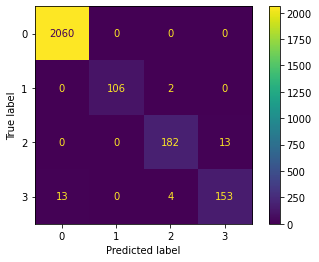

In [22]:
print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Now, we want to explore a little bit on how well we are doing, therefore we first try the simplist case, in which we just don't take the value of date, time into account but having all the other variables availble to use.

Accuracy0.9885511251480458


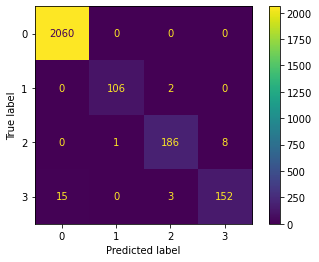

In [23]:
# Read data
data = pd.read_csv(r"Occupancy_Estimation.csv")
X_without_date=data.drop(columns=["Room_Occupancy_Count","Date","Time"])
X_train_nodate, X_test_nodate, y_train_nodate, y_test_nodate = train_test_split(X_without_date, y, random_state=0)

# Fitting data
clf_nodate = RandomForestClassifier(max_depth=3, random_state=0)
clf_nodate.fit(X_train_nodate, y_train_nodate)
y_pred_nodate=clf_nodate.predict(X_test_nodate)

# Accuracy and confusion matrix
print("Accuracy" + str(accuracy_score(y_test_nodate,y_pred_nodate)))
confusion_matrix = metrics.confusion_matrix(y_test_nodate,y_pred_nodate)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Our reported accuracy scores are 0.987 (all features including date/time) and 0.988 (all features excluding date/time). 

In order to find the most relevant sensors, we use feature_importances_ property that provides a ranked list of the importance scores for each feature used in the Random Forest model. The higher the score, the more important the feature is in making accurate predictions. The highest three score reported are 0.24196258, 0.13430008, and 0.13225442 that represent light, sound and CO2 slope feature respectively.

In [24]:
relevant_sensors = clf_nodate.feature_importances_

The highest three scores recorded are 0.24196258, 0.13430008, and 0.13225442, which correspond to the light, sound, and CO2 slope features, respectively. These results appear reasonable since light, sound, and CO2 slope are the most effective indicators of room occupancy. The light sensor can detect movements of individuals entering and leaving the room, enabling estimation of occupancy and monitoring of movement patterns. Sound sensors can capture sounds produced by people in the room, such as talking, walking, or other actions. By analyzing the frequency and intensity of these sounds, it is possible to determine the number of individuals in the room and their level of activity. CO2 slope sensors can identify fluctuations in the concentration of carbon dioxide in the atmosphere, which may indicate the presence of individuals breathing and exhaling. This data can be utilized to estimate occupancy and determine ventilation requirements.

# Evaluation Metrics

Because we are doing a data classification, which is a classification problem, then the most appropriate error metrics are related to how many classifications we made on the test data are right or not; in other words, we have to avoid misclassification as much as possible. As we will use logistic regression in our model to predict the probability of data containing 0,1,2,3 people in total. We are going to use the recall: which is the true positive rate, which is the P(detect positive | true positive), and this equals to P(detect positive and true positive)/P(true positive), and we want this probability as closer to one as possible for a good model. Another error metric we use is the specificity, which calculates the probability of having correct negative labels. Mathematically,  P(detect negative | true negative), which is equivalent to P(detect negative and true negative)/P(true negative).

We want to maximize the presicion since we care a lot if a person detected positive is positive. But in our case, we don’t have special weight on either side of the positive/negative, this is why we care about the both true posibve rate and true negative rate equally. We will use these metrics into either One vs One or One vs Rest to validate if our model is solid.

A good model is where it has both low occurrences of Type I and Type II error, which are false positives and false negatives. If the model has higher recall and specificity, this means the model is accurate. We may also take into account of F-score, and we want a higher F-score as possible.

# Ethics & Privacy

One ethical problem it may raise is that it is the case the people who don’t move will highly likely be ignored by the motion detector. For example, a disabled person who doesn’t move will have low motion data, and it is easy for us to misclassify it as a room has no people, but in fact, they are classified as real people. This may seem offensive to them.


Additionally, after our model is trained well and has low test error and generation error, our model may be misused by a person who illegally wants to pry on others, since some people may don’t want others to know if they appear in a room, and most pries are illegal.


Lastly, we have to think about security issues: when bad thieves use our model to detect how many people are there in an apartment, it may give them ideas about when to come in. In other words, if our model has predicted that none of the people in the room, this may provide opportunities for illegal actions such as theft

# Team Expectations 

* As a team, its is important to have regular team meetings to discuss progress, challenges, and updates. This provides an opportunity for team members to share their thoughts and ideas and provide feedback.
* We also realize that there may be conflicts (for instance, some want to use model A and some want to use model B instead, and both come up with concise and logical reasons). In this case, we will ask for advice from the professor and TAs to make sure that all of us are in the good track. For difficulty, we can do the same thing: actively participate in the office hour and lectures to give us the opportunity to overcome the difficulties.
* When making the decision, we will do a plural mode of the vote, and the same for setting goals and schedule, Regular check-ins can help ensure that everyone is on track and adjustments can be made as soon as possible.
* Each team member should have a clear understanding of their responsibilities and workload. It's important to set each individual the same amount of time and work to make sure that we are going to finish on time, and starting early is important for us. 

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Task |
|---|---|---|
| 2/18  | 7 PM  | Group member introudction and Project kickoff |
| 2/20  | 7 PM  | Discuss project goals and divide tasks to each team members, Research on potential topics and select useful datasets, Review and finalize the selection |
| 2/22  | Morning  | Project Proposal Submission Deadline |
| 2/29  | 7 PM  | Discuss and choose appropriate and efficienty ML models, start building and training the selected ML models, Review progress and look for any issues appearing|
| 3/7  | 7 PM  | Checkpoint Write-up: Preliminary results including feature detection performance, learning or validation curves for model, etc. |
| 3/8  | Morning  | Checkpoint Submission Deadline |
| 3/15  | 7 PM  | Continue building and training ML models, Evaluate model performance and refine as needed, Prepare project presentation and finalize code |
| 3/22  | Before 11:59 PM | Final Project Submission Deadline, and Team Evaluation Survey  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Wang, Wei, et al. "Occupancy prediction through machine learning and data fusion of environmental sensing and Wi-Fi sensing in buildings." Energy and Buildings, vol. 177, 2018, pp. 14-26, doi: 10.1016/j.enbuild.2018.07.003.<br> 
<a name="admonishnote"></a>2.[^](#admonish): Singh, Adarsh Pal. "Machine Learning for IoT Applications: Sensor Data Analytics and Data Reduction Techniques." IIIT/TH/2020/64, advisor: Sachin Chaudhari, 30 June 2020.<br>
<a name="admonishnote"></a>3.[^](#admonish): Singh, A. P., Jain, V., Chaudhari, S., Kraemer, F. A., Werner, S., & Garg, V. (2018). Machine learning-based occupancy estimation using multivariate sensor nodes. In 2018 IEEE Globecom Workshops (GC Wkshps) (pp. 1-6). IEEE..<br>